# Анализ клиентуры

## Изменение количества подписчиков и покупателей (годовой)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
members = []
casuals = []
for year in range(2013, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    casuals.append(len(df.loc[(df['member_casual'] == 'Customer') | (df['member_casual'] == 'casual')]))
    members.append(len(df.loc[(df['member_casual'] == 'Subscriber') | (df['member_casual'] == 'member')]))

/tmp/ipykernel_10408/4032614782.py:4: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/4032614782.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/4032614782.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=Fals

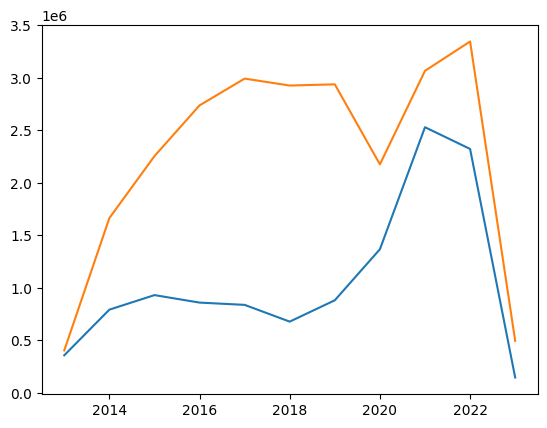

In [3]:
plt.plot(range(2013, 2024), casuals)
plt.plot(range(2013, 2024), members)
plt.show()

Вывод: люди с подпиской пользуются сервисом чаще (сильное падение в конце обусловлено тем, что там указано всего 3 месяца наблюдений), однако из-за самоизоляции популярность этого метода снизилась

## Деление клиентских сегментов по возрасту

In [4]:
age_hist = None
for year in range(2013, 2020):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    if year == 2013:
        age_hist = df[['id', 'age']].dropna().groupby(by=['age']).count()
    else:
        age = df[['id', 'age']].dropna().groupby(by=['age']).count()
        age_hist = pd.concat([age_hist, age]).reset_index().groupby(by='age').sum()
age_hist

/tmp/ipykernel_10408/2690125534.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/2690125534.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/2690125534.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=Fals

,id
age,
0.0,7
1.0,46
5.0,5
13.0,32
14.0,182
...,...
129.0,1
130.0,3
131.0,20


In [5]:
res = age_hist.reset_index()
res = res[res['age'] < 100]

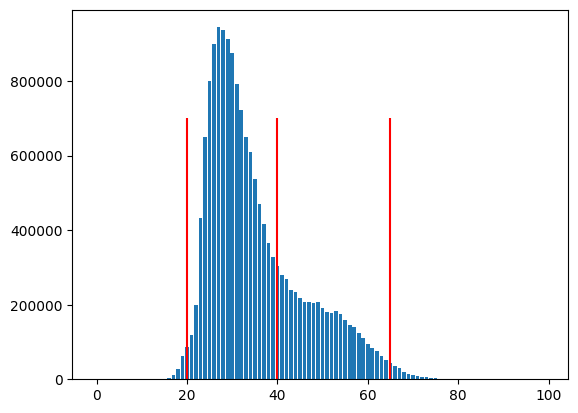

In [6]:
plt.bar(res['age'], res['id'])
plt.vlines(20, 0, 700000, color='r')
plt.vlines(40, 0, 700000, color='r')
plt.vlines(65, 0, 700000, color='r')

Вывод: мы можем разделить пользователей на сегменты, представленные на рисунке выше, наш главный сегмент - 20-40 лет, второй - 40-65, остальные нас интересуют в меньшей степени

## Анализ подписчиков и покупалетей по сегментам

In [7]:
types = {"<20": [0, 0], "20-39": [0, 0], "40-64": [0, 0], ">=65": [0, 0]}
for year in range(2013, 2020):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')[['age', 'member_casual']]
    types['<20'][0] += len(df[(df['age'] < 20) & (df['member_casual'] == 'Customer')])
    types['<20'][1] += len(df[(df['age'] < 20) & (df['member_casual'] == 'Subscriber')])
    types['20-39'][0] += len(df[(df['age'] >= 20) & (df['age'] < 40) & (df['member_casual'] == 'Customer')])
    types['20-39'][1] += len(df[(df['age'] >= 20) & (df['age'] < 40) & (df['member_casual'] == 'Subscriber')])
    types['40-64'][0] += len(df[(df['age'] >= 40) & (df['age'] < 65) & (df['member_casual'] == 'Customer')])
    types['40-64'][1] += len(df[(df['age'] >= 40) & (df['age'] < 65) & (df['member_casual'] == 'Subscriber')])
    types['>=65'][0] += len(df[(df['age'] >= 65) & (df['member_casual'] == 'Customer')])
    types['>=65'][1] += len(df[(df['age'] >= 65) & (df['member_casual'] == 'Subscriber')])

/tmp/ipykernel_10408/984344956.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')[['age', 'member_casual']]
/tmp/ipykernel_10408/984344956.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')[['age', 'member_casual']]
/tmp/ipykernel_10408/984344956.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_ta

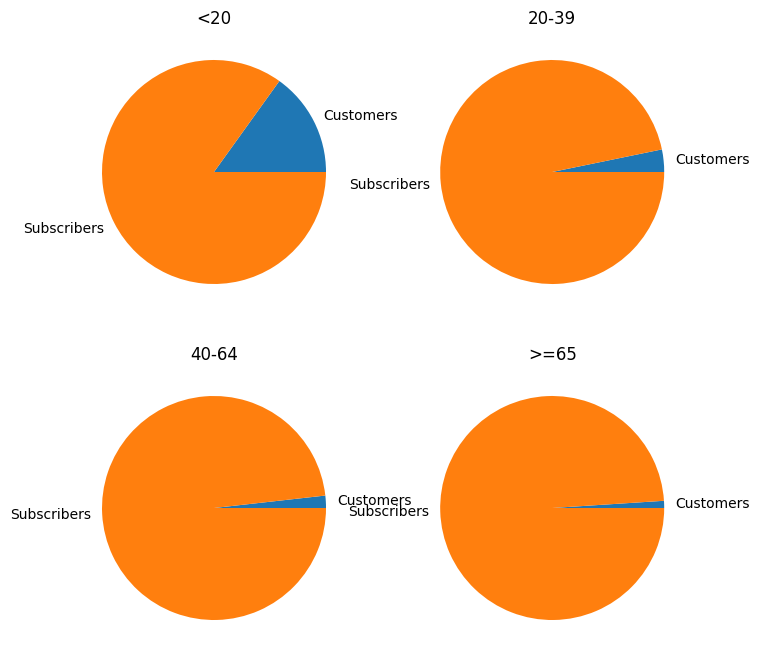

In [8]:
i = 1
plt.figure(figsize=(8, 8))
for tp in list(types.keys()):
    plt.subplot(2, 2, i)
    plt.title(tp)
    plt.pie(types[tp], labels=['Customers', 'Subscribers'])
    i += 1

Вывод: популярность подписки не сильно зависит от сегмента

## Анализ подписчиков и покупателей по типу байка

In [9]:
types = None
res = None
for year in range(2020, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    types = df[['biketype', 'member_casual']]
    classes = pd.get_dummies(types['member_casual'])
    types = types.join(classes)
    types = types[['biketype', 'casual', 'member']].groupby(by='biketype').sum()
    if res is None:
        res = types
    else:
        res = pd.concat([res, types]).groupby(by='biketype').sum()
res

,casual,member
biketype,,
classic_bike,2218334,3991789
docked_bike,1642799,1820293
electric_bike,2501704,3268968


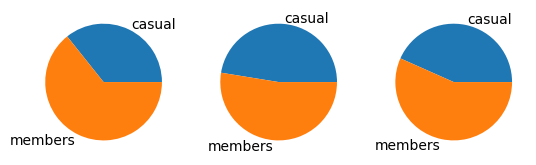

In [10]:
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.pie(res.iloc[i].tolist(), labels=['casual', 'members'])

Вывод: байки с доками почти поровну используются подписчиками и покупателями

## Анализ соотношения использования различных типов байков

In [11]:
res = None
for year in range(2020, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    types = df[['biketype', 'id']].groupby(by='biketype').count()
    if res is None:
        res = types
    else:
        res = pd.concat([res, types]).groupby(by='biketype').sum()
res

,id
biketype,
classic_bike,6210123
docked_bike,3463092
electric_bike,5770672


([<matplotlib.patches.Wedge at 0x7fed8a9ffa30>,
 [Text(0.3329804101735338, 1.048391170527807, 'classic_bike'),
  Text(-1.095607807006059, -0.09820149299971943, 'docked_bike'),
  Text(0.42524506127276435, -1.0144785053726486, 'electric_bike')])

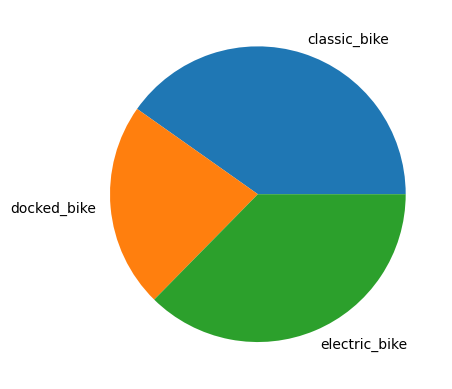

In [12]:
plt.pie(res['id'].tolist(), labels=res.reset_index()['biketype'].tolist())

Вывод: доковые байки используют реже всего, классические и электрические используются примерно поровну

## Анализ доходов с покупок

In [14]:
import datetime


res = None


def get_price(df):
    df['output'] = (1 + df['output'] * 0.42) if df['biketype'] == 'docked_bike' or df['biketype'] == 'electric_bike' else (1 + df['output'] * 0.17)
    return df


for year in range(2020, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    df = df[['member_casual', 'biketype', 'starttime', 'endtime']].dropna()
    df = df[df['member_casual'] == 'casual']
    df['starttime'] = df['starttime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
    df['endtime'] = df['endtime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
    df['output'] = df['endtime'] - df['starttime']
    df = df[['biketype', 'output']].groupby(by='biketype').sum().reset_index()
    df['output'] = df['output'].apply(lambda x: x.total_seconds() / 60)
    df = df.apply(get_price, axis=1)
    if res is None:
        res = df
    else:
        res = pd.concat([res, df]).groupby('biketype').sum().reset_index()
print(res['output'].sum() / 3.25)

22780302.223435897


## Анализ прогулочных сессий

In [15]:
res = []
percent_res = []
points = []
for year in range(2013, 2024):
    df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
    df = df[['startstation', 'endstation', 'startlat', 'startlng']].dropna()
    full = len(df)
    df = df[df['startstation'] == df['endstation']]
    points.extend((df['startlng'].astype(str) + ',' + df['startlat'].astype(str)).tolist())
    points = list(set(points))
    res.append(len(df))
    percent_res.append(len(df) / full)

/tmp/ipykernel_10408/1594772344.py:5: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/1594772344.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age', 'bikeid'], sep=',')
/tmp/ipykernel_10408/1594772344.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'data/src/{year}/part-00000', index_col=Fals

In [16]:
print(sum(res) / 10.25)
print(sum(percent_res) / 10.25)

167669.75609756098
0.056075698962058565


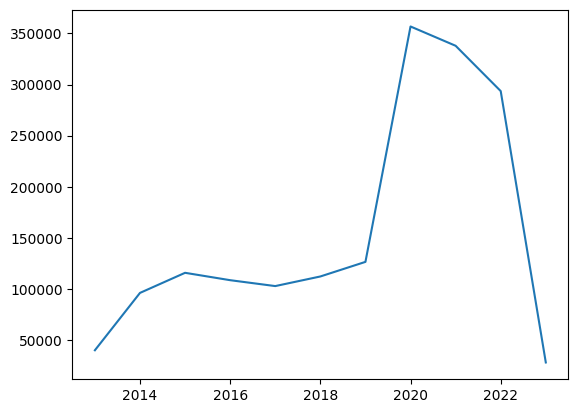

In [17]:
plt.plot(range(2013, 2024), res)

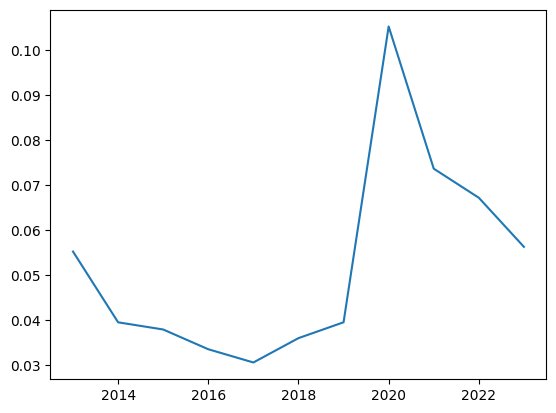

In [18]:
plt.plot(range(2013, 2024), percent_res)

Вывод: коронавирус сделал свое дело, люди стали чаще быстренько ездить, но большинство все равно ездят от пункта до другого пункта

In [22]:
import requests


API_SERVER = "http://static-maps.yandex.ru/1.x"


def set_request(points):
    params = {"ll": "-87.623766,41.875732",
              "spn": "0.15,0.15",
              "l": 'map'}
    params['pt'] = '~'.join(points)
    image = requests.get(API_SERVER, params)
    with open('data/map.png', "wb") as file:
        file.write(image.content)

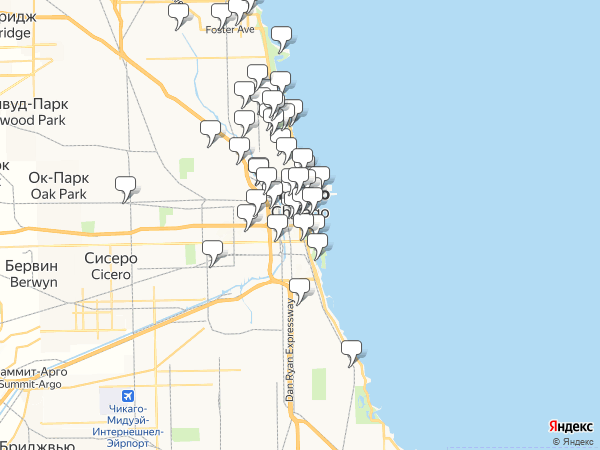

In [33]:
set_request(points[100:150])
from IPython.display import Image
Image(filename='data/map.png')